In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("secom.data", sep=" ", header=None)
print("Shape:", df.shape)
df.head()


Shape: (1567, 590)


,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


Data Cleaning & Visualization

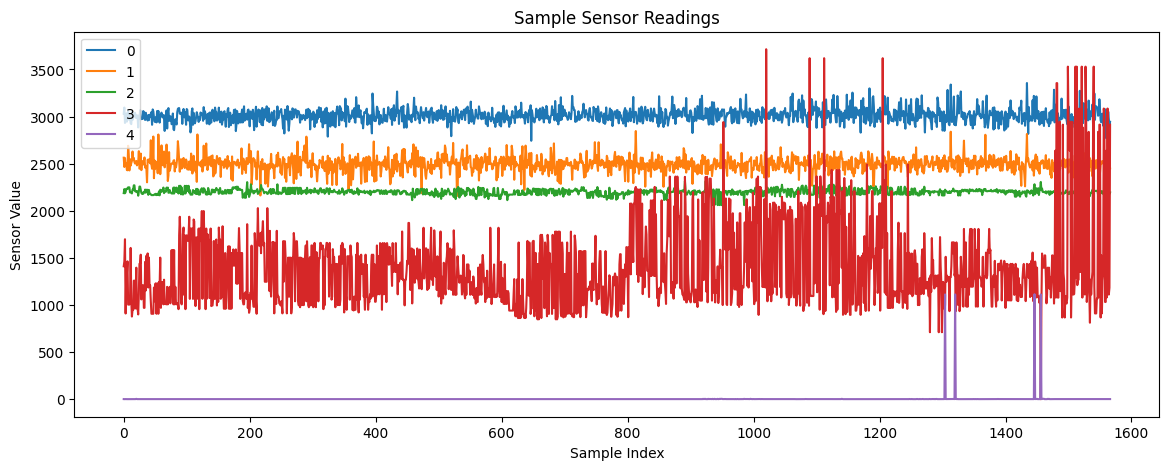

In [2]:
# Replace missing values with column mean
df.replace(to_replace='?', value=np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.fillna(df.mean(), inplace=True)

# Basic stats
df.describe().T[['mean', 'std']].head(10)

# Plot a few sensor signals
df.iloc[:, :5].plot(figsize=(14, 5), title='Sample Sensor Readings')
plt.xlabel("Sample Index")
plt.ylabel("Sensor Value")
plt.show()


USING ISOLATION FOREST, TRAIN THE ABNORMAL DETECTION :

In [3]:
from sklearn.ensemble import IsolationForest

# Train Isolation Forest on all sensors
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
model.fit(df)

# Predict anomalies (-1 = anomaly, 1 = normal)
df['anomaly'] = model.predict(df)
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})  # 1 = anomaly

# Count detected anomalies
print("Detected anomalies:", df['anomaly'].sum())


Detected anomalies: 79


VISUALIZE THE RESULT

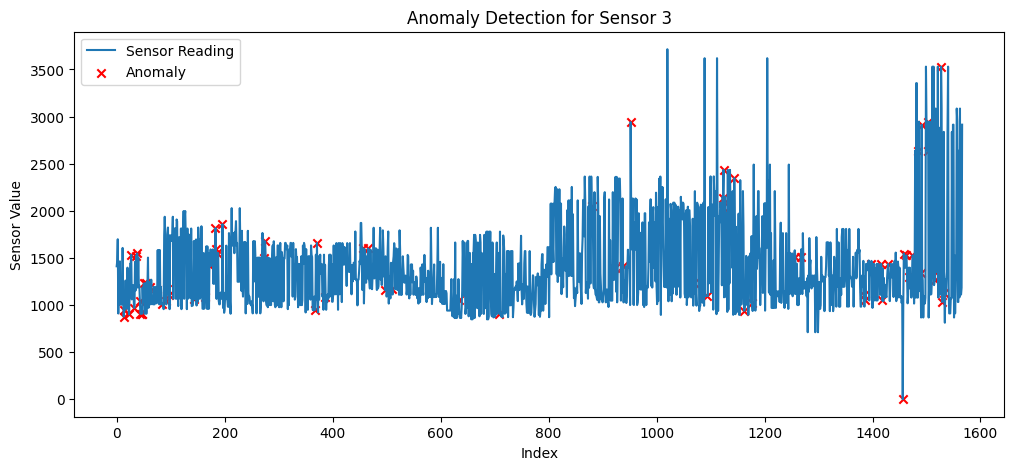

In [4]:
# Visualize anomaly points for one sensor
sensor_idx = 3  # You can change this
plt.figure(figsize=(12,5))
plt.plot(df.index, df[sensor_idx], label="Sensor Reading")
plt.scatter(df[df['anomaly'] == 1].index,
            df[df['anomaly'] == 1][sensor_idx],
            color='red', label='Anomaly', marker='x')
plt.legend()
plt.title(f"Anomaly Detection for Sensor {sensor_idx}")
plt.xlabel("Index")
plt.ylabel("Sensor Value")
plt.show()
